# Lego Data Analysis - Rebrickable 

The dataset is available at https://rebrickable.com/downloads/.

From the Rebrickable website - "The LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database is available for download as csv files here. These files are automatically updated daily. If you need more details, you can use the API which provides real-time data, but has rate limits that prevent bulk downloading of data."

Rebrickable provides this database to be used for any purpose.

# LEGO Date Model

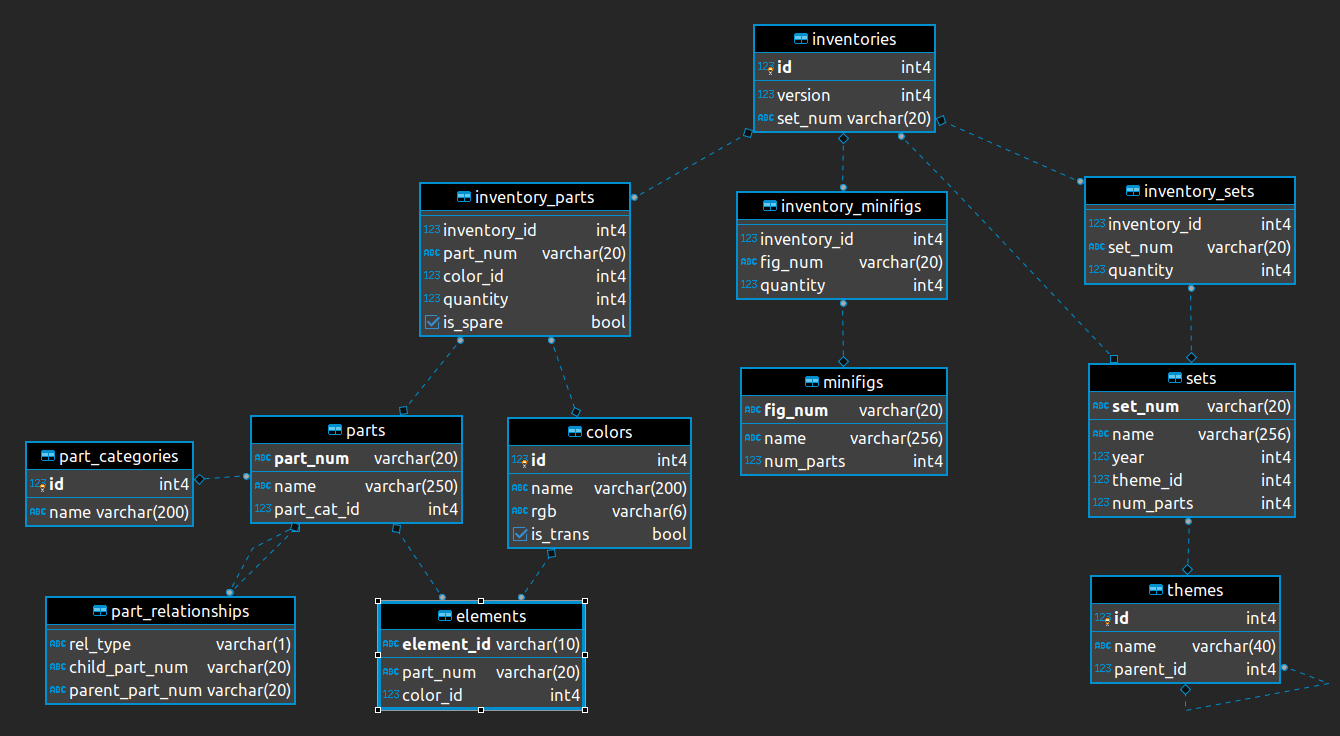

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 

### Getting Data

In [8]:
sets = pd.read_csv(r"C:\Users\senay\Downloads\Rebrickable Data\sets.csv")

sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
19755,XWING-1,Mini X-Wing Fighter,2019,158,60
19756,XWING-2,X-Wing Trench Run,2019,158,52
19757,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
19758,YTERRIER-1,Yorkshire Terrier,2018,598,0


In [7]:
themes = pd.read_csv(r"C:\Users\senay\Downloads\Rebrickable Data\themes.csv")
themes

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
441,720,The Muppets,535.0
442,721,Icons,NaN
443,722,Jurassic World,504.0
444,724,Avatar,NaN


#### Display Top 10 Rows of the sets datasets

In [9]:
sets.head(10)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1979,186,15
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4


#### Display Last 10 Rows of the sets datasets

In [11]:
sets.tail(10)

,set_num,name,year,theme_id,num_parts
19750,XBOXGAME-1,Batman the Videogame - Xbox 360,2008,501,0
19751,XBOXGAME-2,Bionicle Heroes - Xbox 360,2006,501,0
19752,XBOXGAME-3,DC Super-Villains - Xbox One,2018,501,0
19753,XBOXGAME-9,Star Wars: The Video Game - Xbox,2005,501,0
19754,XMASTREE-1,Christmas Tree,2019,410,26
19755,XWING-1,Mini X-Wing Fighter,2019,158,60
19756,XWING-2,X-Wing Trench Run,2019,158,52
19757,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
19758,YTERRIER-1,Yorkshire Terrier,2018,598,0
19759,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


#### Check Datatype of Each Column

In [12]:
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

#### Check Null Values in Sets

In [14]:
sets.isnull().sum()
#No nullss were found as all were zero in each columns

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

#### Check Null Values in Themes

In [16]:
themes.isnull()

,id,name,parent_id
0,False,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
441,False,False,False
442,False,False,True
443,False,False,False
444,False,False,True


In [15]:
themes.isnull().sum()
#We found nulls in parent_id column

id             0
name           0
parent_id    140
dtype: int64

#### How many Rows and Columns are there in our dataset

In [17]:
sets.shape
#We have 19760 records and  5 columns 

(19760, 5)

In [19]:
len(sets.columns)
# number of columns

5

In [21]:
len(sets)
# number of records

19760

In [22]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19760 entries, 0 to 19759
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    19760 non-null  object
 1   name       19760 non-null  object
 2   year       19760 non-null  int64 
 3   theme_id   19760 non-null  int64 
 4   num_parts  19760 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 772.0+ KB


## Merge Data

#### Joining the two datasets to answer questions

In [50]:
sets_themes = pd.merge(sets, themes, how = 'left', left_on = 'theme_id', right_on = 'id', suffixes = ('_sets', '_themes'))

In [51]:
sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


In [52]:
sets_themes.columns

Index(['set_num', 'name_sets', 'year', 'theme_id', 'num_parts', 'id',
       'name_themes', 'parent_id'],
      dtype='object')

In [53]:
sets_themes.info

<bound method DataFrame.info of            set_num                        name_sets  year  theme_id  \
0            001-1                            Gears  1965         1   
1           0011-2                Town Mini-Figures  1979        67   
2           0011-3       Castle 2 for 1 Bonus Offer  1987       199   
3           0012-1               Space Mini-Figures  1979       143   
4           0013-1               Space Mini-Figures  1979       143   
...            ...                              ...   ...       ...   
19755      XWING-1              Mini X-Wing Fighter  2019       158   
19756      XWING-2                X-Wing Trench Run  2019       158   
19757  YODACHRON-1  Yoda Chronicles Promotional Set  2013       158   
19758   YTERRIER-1                Yorkshire Terrier  2018       598   
19759     ZX8000-1             ZX 8000 LEGO Sneaker  2020       501   

       num_parts   id   name_themes  parent_id  
0             43    1       Technic        NaN  
1             12 

### Now Let's Answer Some Questions

#### 1) What is the total number of parts per theme

In [54]:
#Group our data by themes 
Num_Parts_Per_Theme = sets_themes.groupby('name_themes').sum().reset_index()
Num_Parts_Per_Theme = Num_Parts_Per_Theme[['name_themes','num_parts']].sort_values('num_parts', ascending = False)
Num_Parts_Per_Theme

,name_themes,num_parts
303,Technic,234805
292,Star Wars,230047
65,Creator,102121
208,Ninjago,101806
118,Friends,100622
...,...,...
228,Powered Up,19
340,Value Packs,1
6,Adventurers,0
20,Avatar,0


#### 2) What is the total number of parts per year

In [55]:
#Group by year to get sum of parts
Num_Parts_Per_Year = sets_themes.groupby('year').sum().reset_index()
Num_Parts_Per_Year = Num_Parts_Per_Year[['year','num_parts']].sort_values('num_parts', ascending = False)
Num_Parts_Per_Year

,year,num_parts
70,2021,264854
71,2022,225235
69,2020,211982
68,2019,191812
66,2017,178360
...,...,...
5,1956,249
3,1954,117
8,1959,65
2,1953,50


#### 3) How many sets were created in each century in the dataset

###### We add century as a derived column to the sets_themes dataset

In [56]:
unique_year = sets_themes['year'].unique()
unique_year.sort()
unique_year

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [58]:
#Create centruy column 
sets_themes['year'] > 2000

sets_themes['Century'] = np.where(sets_themes['year'] > 2000, '21st_century', '20th_century')

sets_themes

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
0,001-1,Gears,1965,1,43,1,Technic,NaN,20th_century
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0,20th_century
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0,20th_century
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th_century
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th_century
...,...,...,...,...,...,...,...,...,...
19755,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st_century
19756,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st_century
19757,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN,21st_century
19758,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN,21st_century


In [62]:
Num_Sets_Per_Century = sets_themes.groupby('Century').count().reset_index()
Num_Sets_Per_Century = Num_Sets_Per_Century[['Century','set_num']].sort_values('set_num', ascending = False)
Num_Sets_Per_Century

,Century,set_num
1,21st_century,14833
0,20th_century,4927


#### 4) What percentage of sets ever released in the 21st century were train themed

In [64]:
Centruy_21_Data = sets_themes [sets_themes['Century'] == '21st_century']
Centruy_21_Data 

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4,497,Books,NaN,21st_century
19,0241187567-1,Ninjago: Build Your Own Adventure,2015,497,74,497,Books,NaN,21st_century
20,0241357594-1,Star Wars: Build Your Own Adventure: Galactic ...,2019,497,70,497,Books,NaN,21st_century
55,0756668530-1,Atlantis: Brickmaster,2010,497,157,497,Books,NaN,21st_century
56,0756672805-1,Pirates: Brickmaster,2009,497,162,497,Books,NaN,21st_century
...,...,...,...,...,...,...,...,...,...
19755,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st_century
19756,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st_century
19757,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN,21st_century
19758,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN,21st_century


In [73]:
#Our trained themed datasets
Train = Centruy_21_Data[Centruy_21_Data ['name_themes'].str.contains('Train')]
Train

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
69,10001-1,Metroliner,2001,233,787,233,Train,NaN,21st_century
70,10002-1,Railroad Club Car,2001,233,293,233,Train,NaN,21st_century
145,10052-1,Intelligent Locomotive (Explore),2003,634,7,634,Trains,504.0,21st_century
171,10078-1,Train Connection Wire,2003,257,1,257,Train,254.0,21st_century
422,10506-1,Train Accessory Set,2013,634,24,634,Trains,504.0,21st_century
...,...,...,...,...,...,...,...,...,...
14777,7939-1,Cargo Train,2010,66,839,66,Trains,52.0,21st_century
14824,7996-1,Double Crossover Track,2007,66,4,66,Trains,52.0,21st_century
14825,7997-1,Train Station,2007,66,387,66,Trains,52.0,21st_century
19042,K7895-1,Oval Track for RC Trains,2006,66,0,66,Trains,52.0,21st_century


In [71]:
Centruy_21_Data.shape

(14833, 9)

In [72]:
Train.shape

(66, 9)

In [74]:
Train.shape[0]

66

In [76]:
Train.shape[0]/Centruy_21_Data.shape[0]*100

0.444953819186948

#### 5) What percentage of sets ever released in the 21st century were disney themed

In [77]:
#Our disney themed dataset
Disney = Centruy_21_Data[Centruy_21_Data ['name_themes'].str.contains('Disney')]
Disney

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
425,10509-1,Dusty and Chug,2013,627,16,627,Disney Planes,504.0,21st_century
427,10510-1,Ripslinger's Air Race,2013,627,40,627,Disney Planes,504.0,21st_century
428,10511-1,Skipper's Flight School,2013,627,53,627,Disney Planes,504.0,21st_century
432,10515-1,Ariel's Undersea Castle,2013,640,39,640,Disney Princess,504.0,21st_century
433,10516-1,Ariel's Magical Boat Ride,2012,640,30,640,Disney Princess,504.0,21st_century
...,...,...,...,...,...,...,...,...,...
18637,BELLE-1,Belle's Castle,2016,579,72,579,Disney Princess,NaN,21st_century
18700,CINDERELLASCASTLE-1,Cinderella’s Castle,2017,608,102,608,Disney,NaN,21st_century
19554,ROSE-1,The Beast's Enchanted Rose,2017,608,0,608,Disney,NaN,21st_century
19660,TRUCOGSWORTH-1,Cogsworth,2016,608,48,608,Disney,NaN,21st_century


In [78]:
Disney.shape

(185, 9)

In [79]:
Disney.shape[0]/Centruy_21_Data.shape[0]*100

1.2472190386300814

#### 6) What is the popular theme by year in terms of sets released in the 21st century

In [80]:
Centruy_21_Data

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4,497,Books,NaN,21st_century
19,0241187567-1,Ninjago: Build Your Own Adventure,2015,497,74,497,Books,NaN,21st_century
20,0241357594-1,Star Wars: Build Your Own Adventure: Galactic ...,2019,497,70,497,Books,NaN,21st_century
55,0756668530-1,Atlantis: Brickmaster,2010,497,157,497,Books,NaN,21st_century
56,0756672805-1,Pirates: Brickmaster,2009,497,162,497,Books,NaN,21st_century
...,...,...,...,...,...,...,...,...,...
19755,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st_century
19756,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st_century
19757,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN,21st_century
19758,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN,21st_century


In [86]:
#Group our data by year and name themes
Popular_Theme_Per_Year = Centruy_21_Data.groupby(['year', 'name_themes' ]).count().reset_index()
Popular_Theme_Per_Year = Popular_Theme_Per_Year[['year', 'name_themes','set_num']].sort_values('set_num', ascending=False)
Popular_Theme_Per_Year.drop_duplicates('year').sort_values('year', ascending=False)


,year,name_themes,set_num
1394,2022,Gear,59
1329,2021,Gear,217
1253,2020,Gear,173
1182,2019,Gear,174
1104,2018,Gear,117
1035,2017,Gear,155
953,2016,Gear,97
866,2015,Gear,101
820,2014,Technic,116
705,2013,Gear,97


#### 7) What is the most produced color of lego ever in terms of quantity of parts?

In [90]:
#Import our color data
colors = pd.read_csv(r'C:\Users\senay\Downloads\Rebrickable Data\colors.csv')
colors

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f
214,1088,Medium Brown,755945,f
215,1089,Warm Tan,CCA373,f


In [91]:
#import our inventory data
inventory_parts = pd.read_csv(r'C:\Users\senay\Downloads\Rebrickable Data\inventory_parts.csv')
inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,stickerupn0077,9999,1,f
3,1,upn0342,0,1,f
4,1,upn0350,25,1,f
...,...,...,...,...,...
1057726,146342,2447,82,1,f
1057727,146342,3626bpr0250,14,1,f
1057728,146342,4736,0,1,f
1057729,146342,970x194,15,1,f


In [93]:
#Merge our inventory and color data on id & color id
color_inventory = pd.merge(inventory_parts, colors, how = 'left', left_on = 'color_id', right_on = 'id')
color_inventory 

,inventory_id,part_num,color_id,quantity,is_spare,id,name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1057726,146342,2447,82,1,f,82,Metallic Gold,DBAC34,f
1057727,146342,3626bpr0250,14,1,f,14,Yellow,F2CD37,f
1057728,146342,4736,0,1,f,0,Black,05131D,f
1057729,146342,970x194,15,1,f,15,White,FFFFFF,f


In [94]:
#Rename our name column to color_name
color_inventory.rename(columns={'name':'color_name'}, inplace = True)
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,color_name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1057726,146342,2447,82,1,f,82,Metallic Gold,DBAC34,f
1057727,146342,3626bpr0250,14,1,f,14,Yellow,F2CD37,f
1057728,146342,4736,0,1,f,0,Black,05131D,f
1057729,146342,970x194,15,1,f,15,White,FFFFFF,f


In [100]:
#Group our merged table based on color
Popular_Color = color_inventory.groupby('color_name').sum().reset_index()
Popular_Color = Popular_Color[['color_name', 'quantity']].sort_values('quantity', ascending = False)

Popular_Color.head(50)

,color_name,quantity
1,Black,669749
58,Light Bluish Gray,403927
199,White,397149
23,Dark Bluish Gray,281203
137,Red,264837
2,Blue,184144
200,Yellow,181628
155,Tan,131519
138,Reddish Brown,111964
60,Light Gray,102084
